<a href="https://colab.research.google.com/github/Tayara32/Estatistica_Machine_Learning/blob/main/Preco_imoveis_hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('hoteis.csv')

In [ ]:
dados.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [ ]:
corr = dados.corr()

In [ ]:
corr['Preco']

,Preco
Estrelas,0.401099
ProximidadeTurismo,-0.697142
Capacidade,0.531866
Preco,1.000000


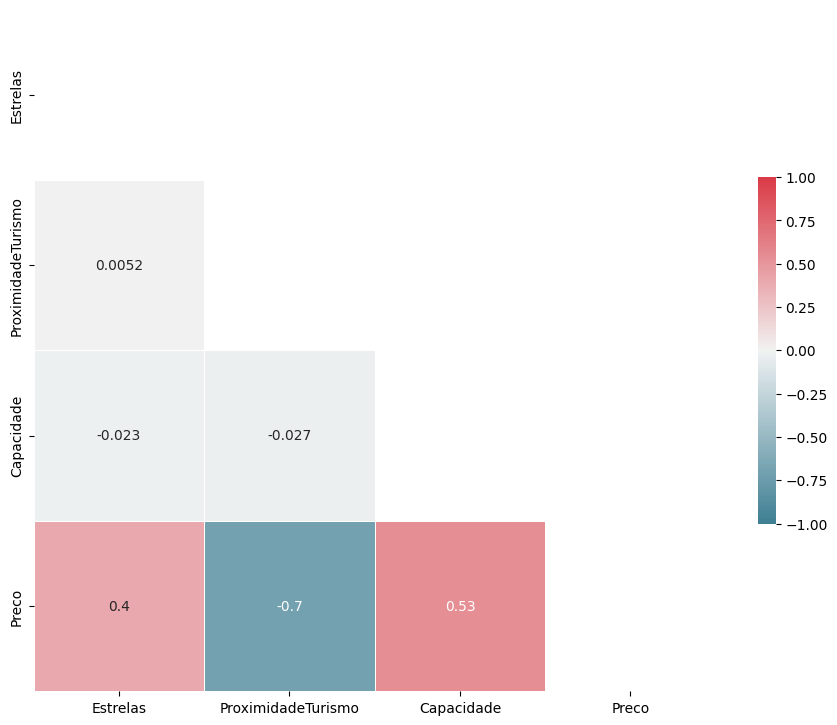

In [ ]:
# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

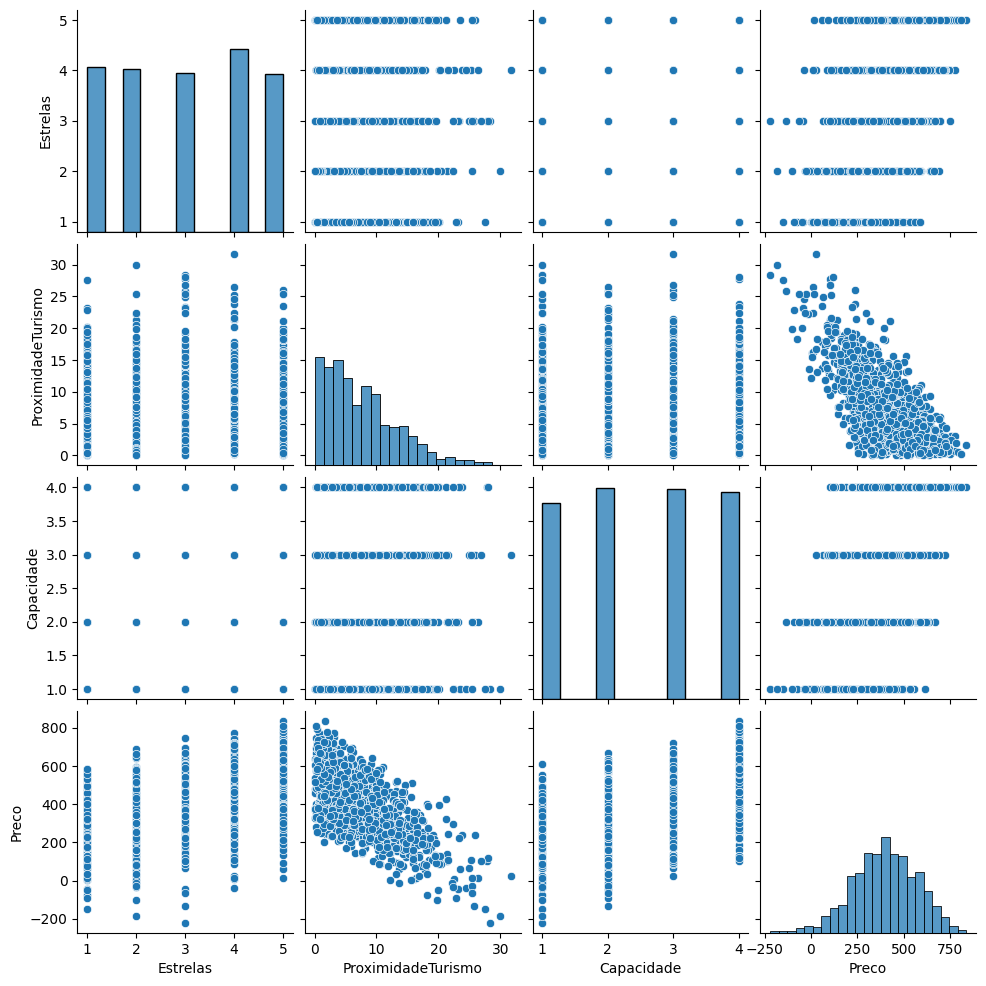

In [ ]:
sns.pairplot(dados)

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
# Modelo 1: Utilizando apenas 'Estrelas'
X1 = dados[['Estrelas']]
X1 = sm.add_constant(X1)  # Adicionando a constante
y = dados['Preco']
modelo_1 = sm.OLS(y, X1).fit()

# Modelo 2: Utilizando 'Estrelas' e 'ProximidadeTurismo'
X2 = dados[['Estrelas', 'ProximidadeTurismo']]
X2 = sm.add_constant(X2)
modelo_2 = sm.OLS(y, X2).fit()

# Modelo 3: Utilizando 'Estrelas', 'ProximidadeTurismo' e 'Capacidade'
X3 = dados[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X3 = sm.add_constant(X3)
modelo_3 = sm.OLS(y, X3).fit()

In [ ]:
print("Modelo 1 - Apenas 'Estrelas':")
print(modelo_1.summary())
print("\nModelo 2 - 'Estrelas' e 'ProximidadeTurismo':")
print(modelo_2.summary())
print("\nModelo 3 - 'Estrelas', 'ProximidadeTurismo' e 'Capacidade':")
print(modelo_3.summary())

Modelo 1 - Apenas 'Estrelas':
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           6.09e-40
Time:                        16:19:48   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517 

In [ ]:
df = pd.read_csv('/content/usina.csv')

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
# Definindo y e X
y = df['PE']
X = df.drop(columns='PE')

In [ ]:
# Adicionando constante
X = sm.add_constant(X)

In [ ]:
# Calculando o VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Variavel'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

  Variavel           VIF
0    const  43761.151866
1       AT      5.977602
2        V      3.943003
3       AP      1.452639
4       RH      1.705290


In [ ]:
# Treinar o modelo
modelo = sm.OLS(y, X).fit()


In [ ]:
# Obter resíduos e valores previstos
residuos = modelo.resid
valores_previstos = modelo.fittedvalues

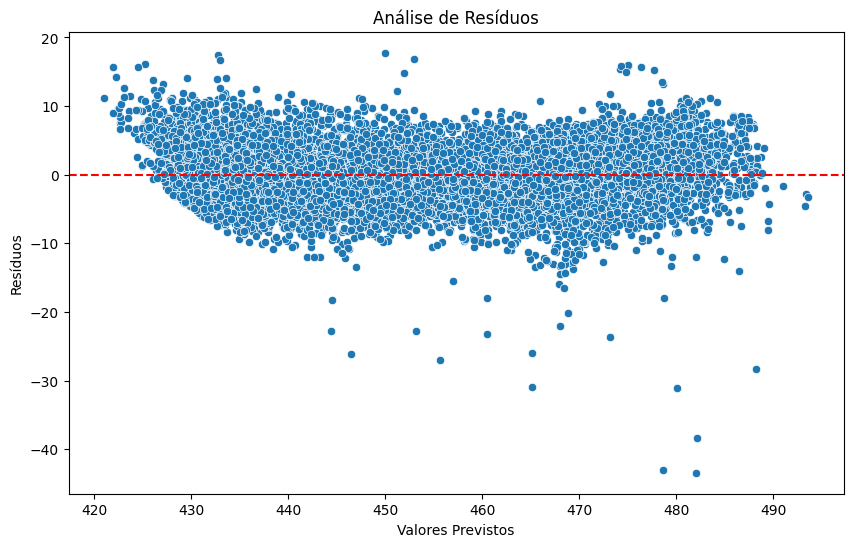

In [ ]:
# Plot dos resíduos


plt.figure(figsize=(10,6))
sns.scatterplot(x=valores_previstos, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Teste formal
bp_test = het_breuschpagan(residuos, X)
nomes = ['LM Stat', 'p-valor LM', 'F Stat', 'p-valor F']

# Resultados
print(dict(zip(nomes, bp_test)))


{'LM Stat': np.float64(33.93020587909628), 'p-valor LM': np.float64(7.701567364408901e-07), 'F Stat': np.float64(8.508290945748113), 'p-valor F': np.float64(7.535756897319197e-07)}
